# Implied volatity prediction 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data 

In [40]:
!ls ../data/

spots_iv_index_spx_ai_daily.xlsx   spots_iv_index_sx5e_ai_daily.xlsx
spots_iv_index_spx_ai_weekly.xlsx  spots_iv_index_sx5e_ai_weekly.xlsx


### spots_iv_index_spx_ai_daily

In [18]:
p = os.path.abspath('../..')
p

'/Users/rekahalmai/PycharmProjects'

In [2]:
import sys, os 

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
    
sys.path  

['/Users/rekahalmai/PycharmProjects/implied_vol_prediction/notebooks ',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python37.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Python/3.7/site-packages',
 '/Library/Python/3.7/site-packages/IPython/extensions',
 '/Users/rekahalmai/.ipython',
 '/Users/rekahalmai/PycharmProjects']

In [3]:
from implied_vol_prediction.src.data import open_and_transform_csv

spots_iv_index_spx_ai_daily = open_and_transform_csv(r'../data/spots_iv_index_spx_ai_daily.xlsx')

In [4]:
spots_iv_index_spx_ai_daily.isnull().sum()

Dates               0
Spot t              0
Spot t-1            0
Implied_vol         0
Duration            0
Strike              0
Real_implied_vol    0
dtype: int64

In [5]:
spots_iv_index_spx_ai_daily.head()

Dates   Spot t  Spot t-1  Implied_vol Duration  Strike  \
0 2019-04-18  2900.45   2900.45      40.2755       6M      30   
1 2019-04-17  2900.45   2907.06      38.8159       6M      30   
2 2019-04-16  2907.06   2905.58      38.4960       6M      30   
3 2019-04-15  2905.58   2907.41      38.0417       6M      30   
4 2019-04-12  2907.41   2888.32      38.5535       6M      30   

   Real_implied_vol  
0         10.216200  
1         10.158454  
2         10.037197  
3         10.041465  
4         10.095491

## EDA with spots_iv_index_spx - daily 

In [14]:
strikes = list(np.unique(spots_iv_index_spx_ai_daily.Strike.values))
durations = ['6M','1Y','18M','2Y','3Y']

strikes, durations

([30, 40, 60, 80, 90, 100, 110, 120, 140], ['6M', '1Y', '18M', '2Y', '3Y'])

Strike = 30, Duration = 6M


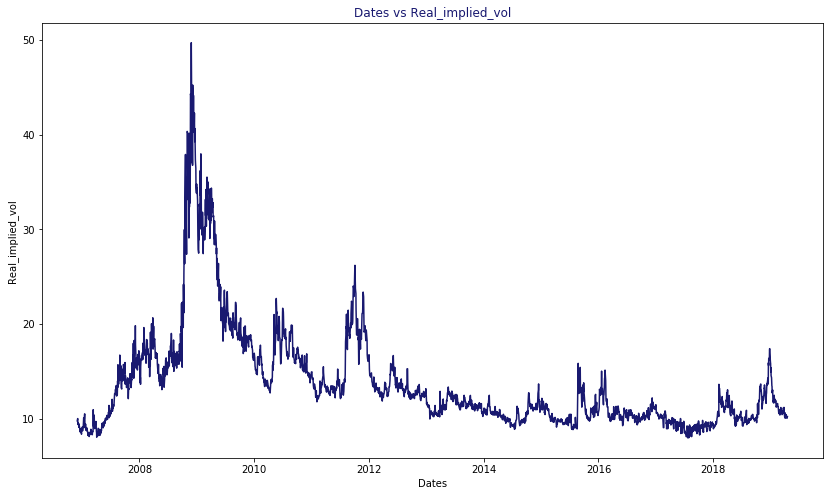

Strike = 30, Duration = 1Y


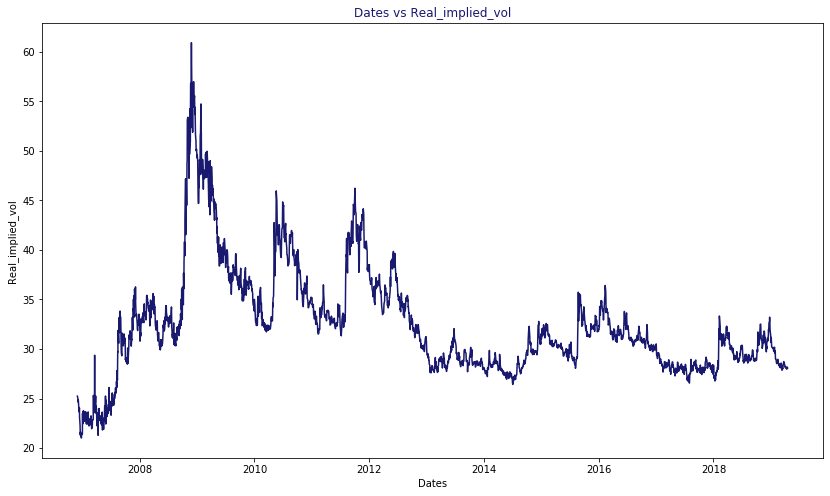

Strike = 30, Duration = 18M


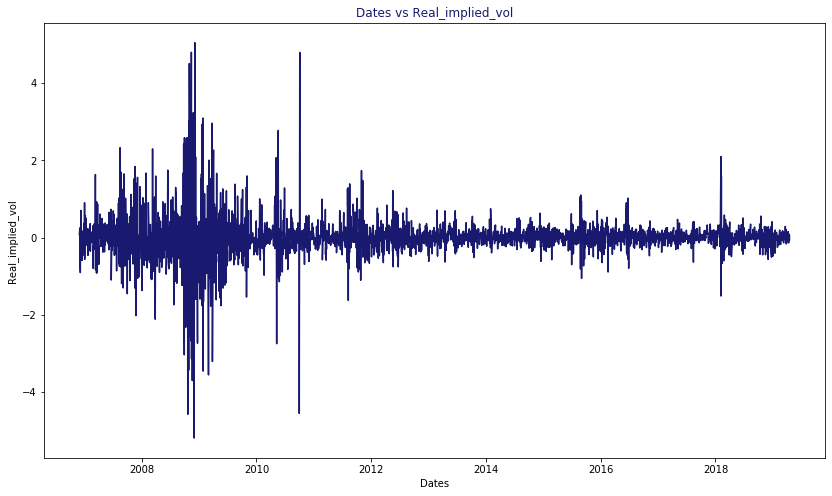

Strike = 30, Duration = 2Y


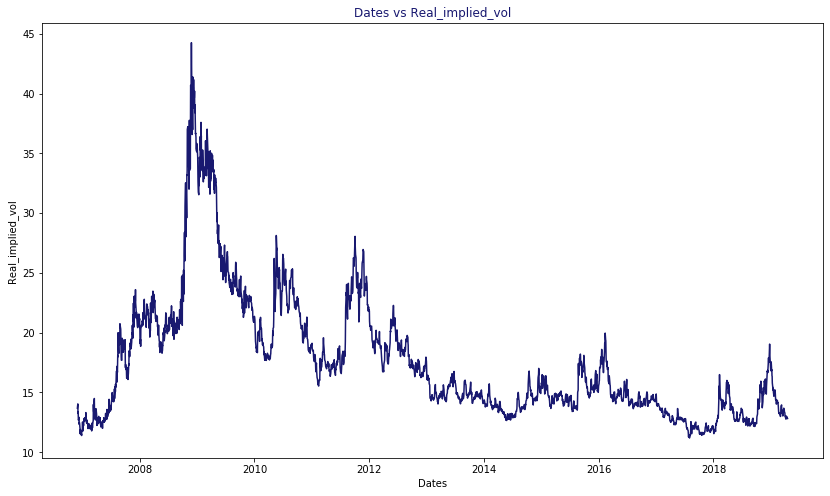

Strike = 30, Duration = 3Y


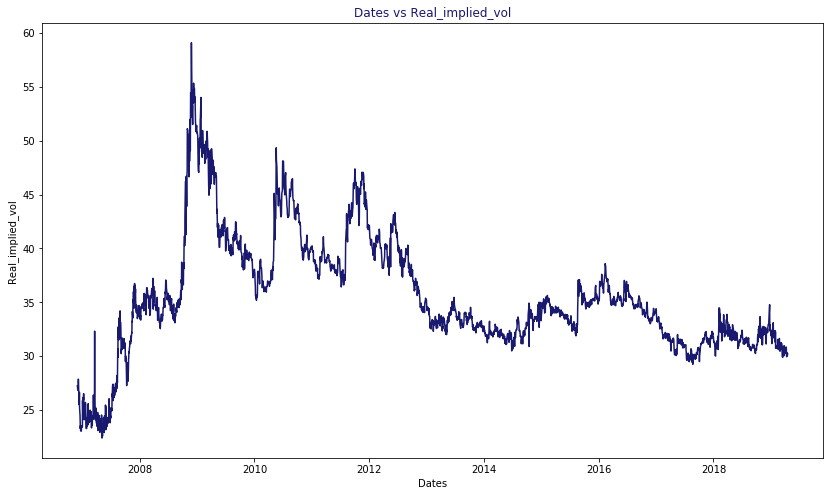

Strike = 40, Duration = 6M


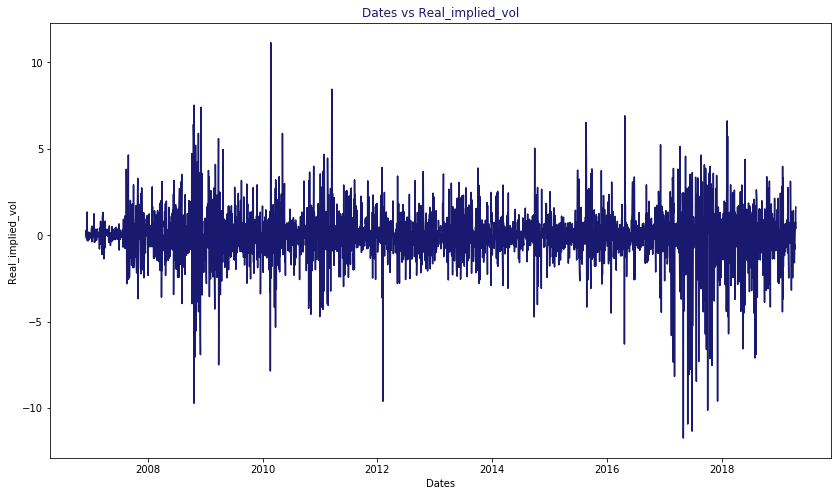

Strike = 40, Duration = 1Y


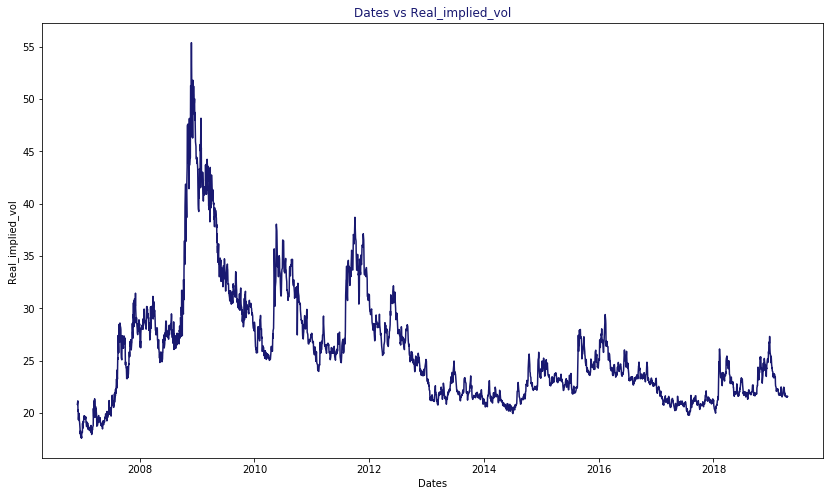

Strike = 40, Duration = 18M


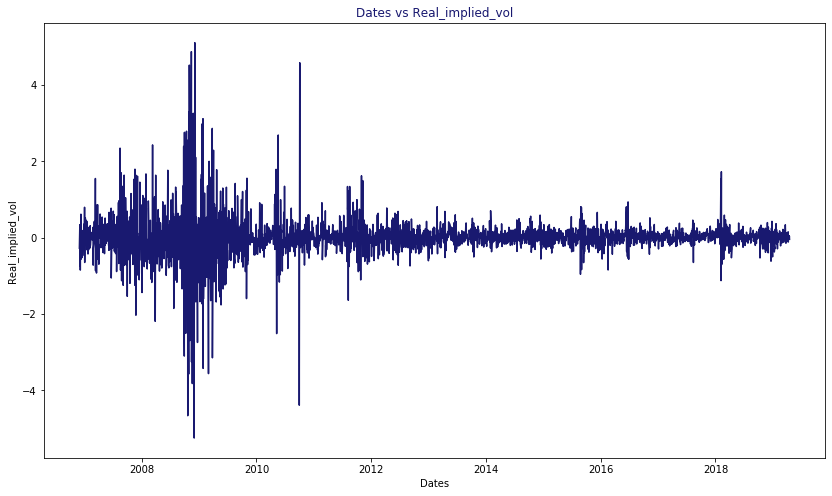

Strike = 40, Duration = 2Y


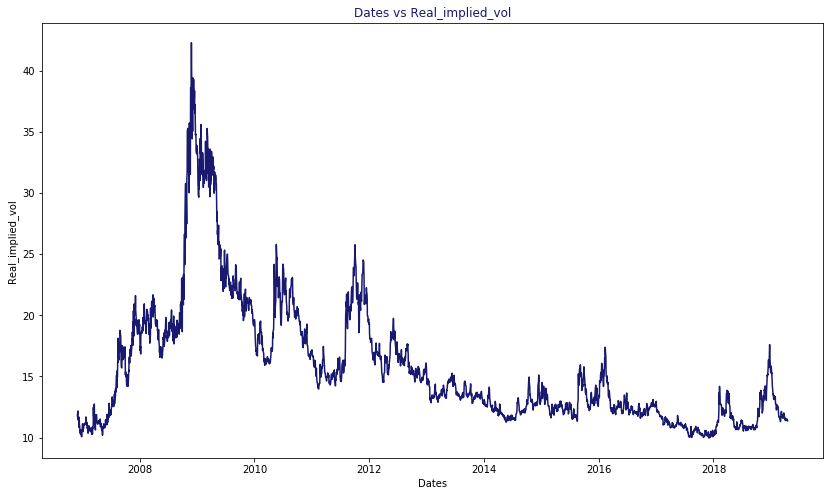

Strike = 40, Duration = 3Y


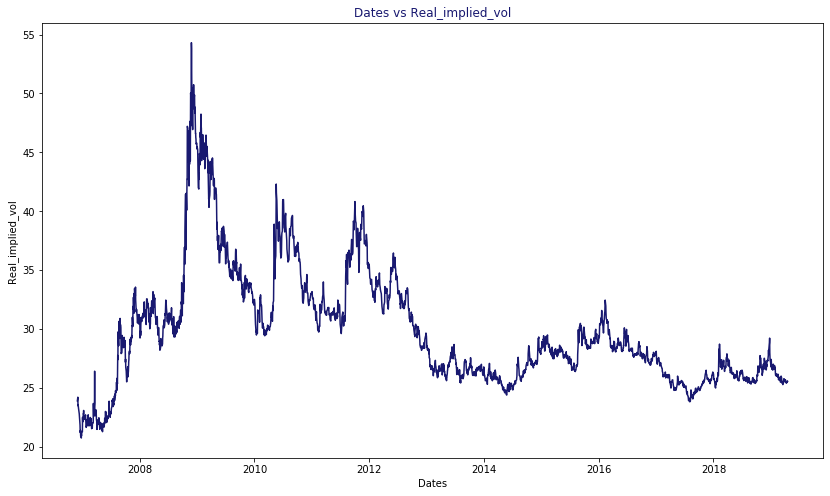

Strike = 60, Duration = 6M


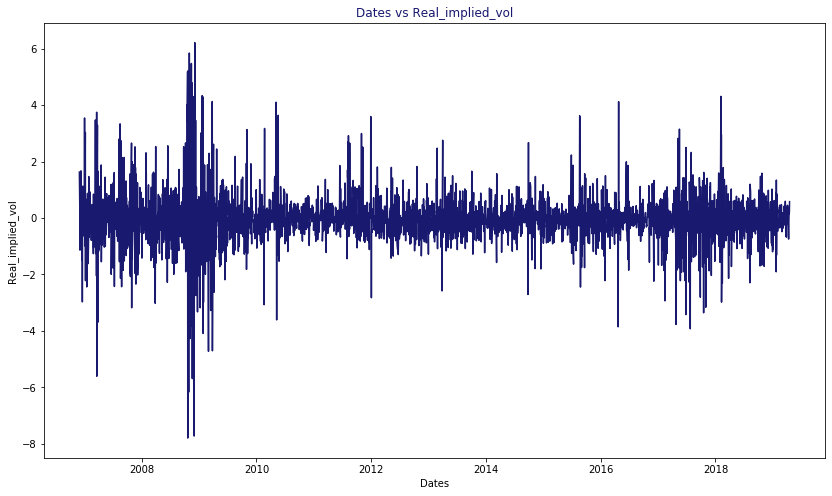

Strike = 60, Duration = 1Y


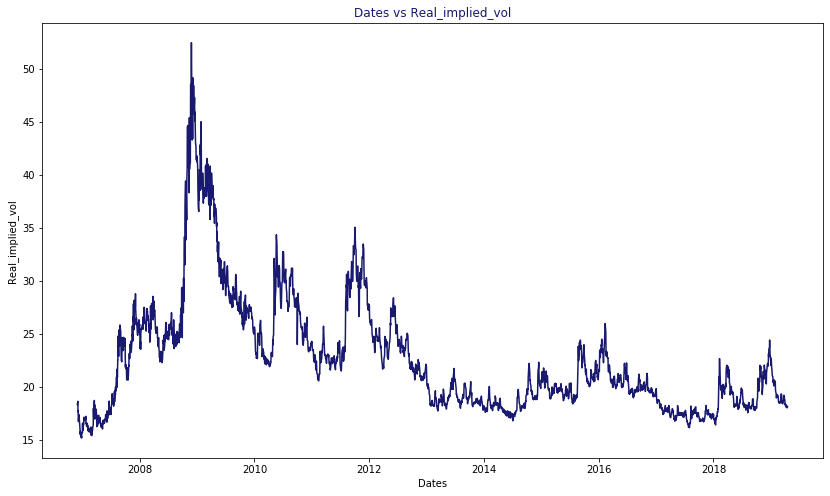

Strike = 60, Duration = 18M


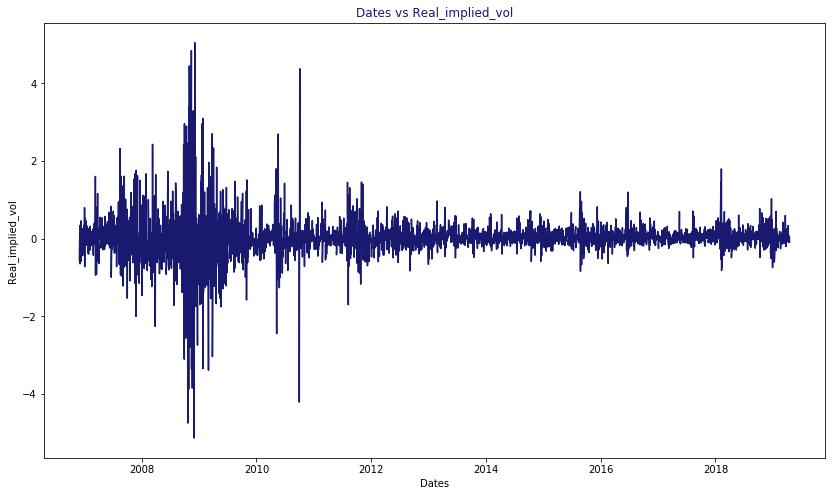

Strike = 60, Duration = 2Y


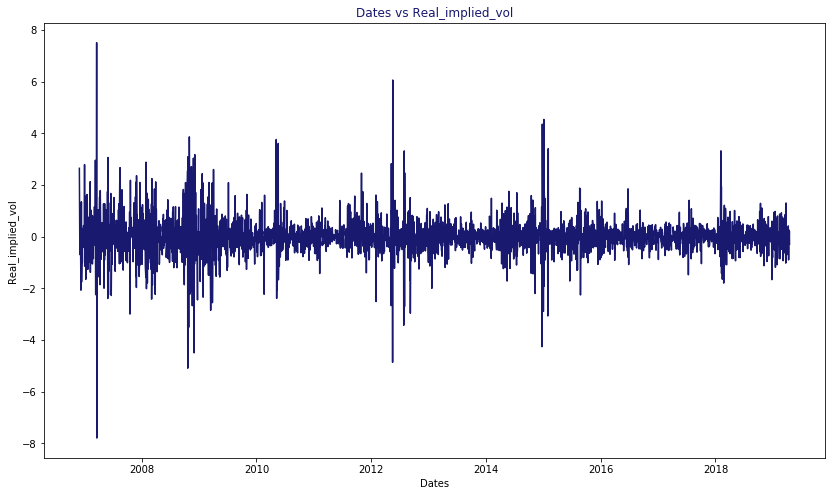

Strike = 60, Duration = 3Y


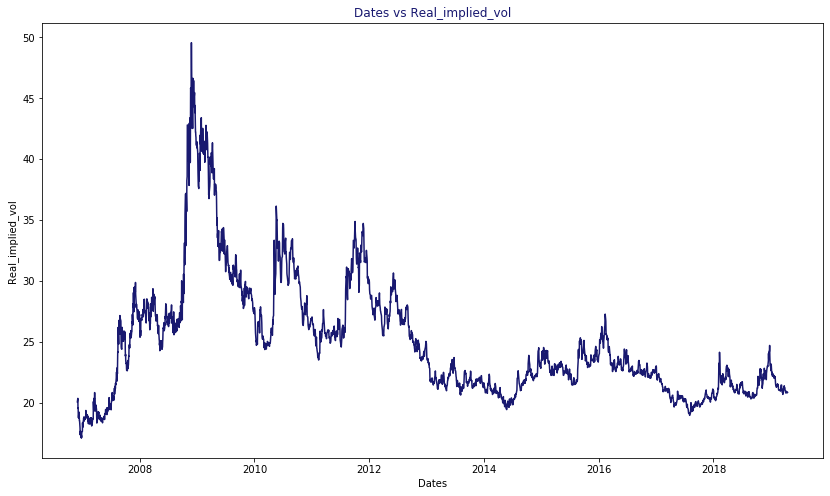

Strike = 80, Duration = 6M


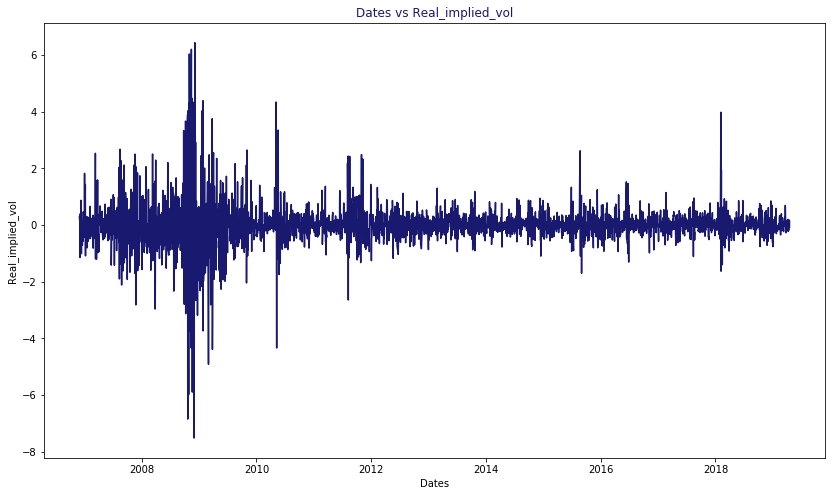

Strike = 80, Duration = 1Y


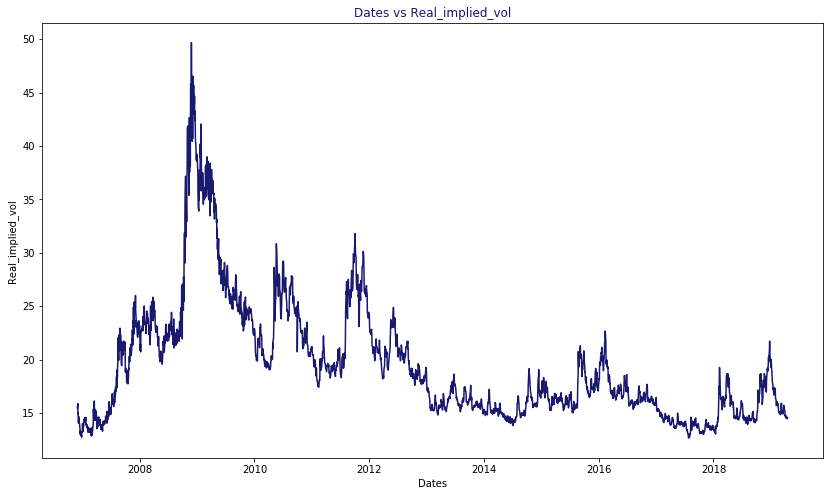

Strike = 80, Duration = 18M


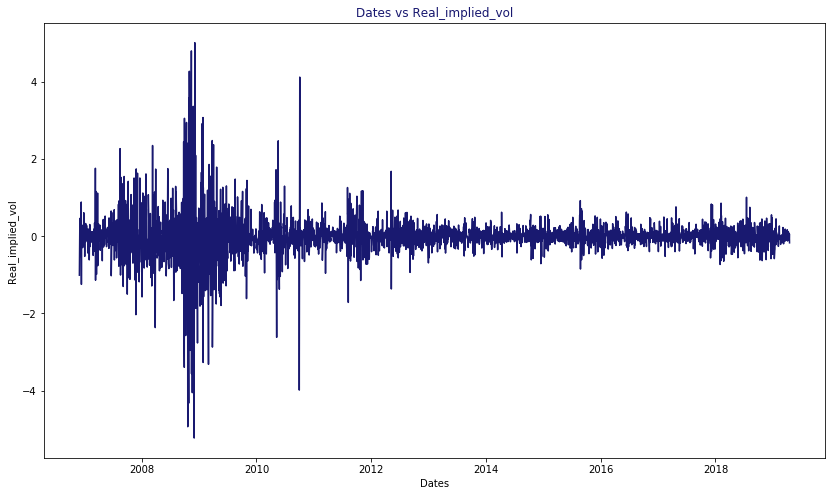

Strike = 80, Duration = 2Y


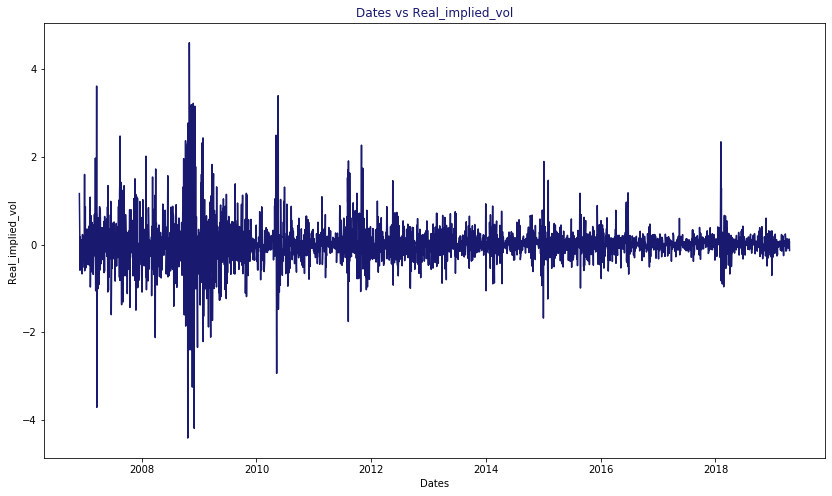

Strike = 80, Duration = 3Y


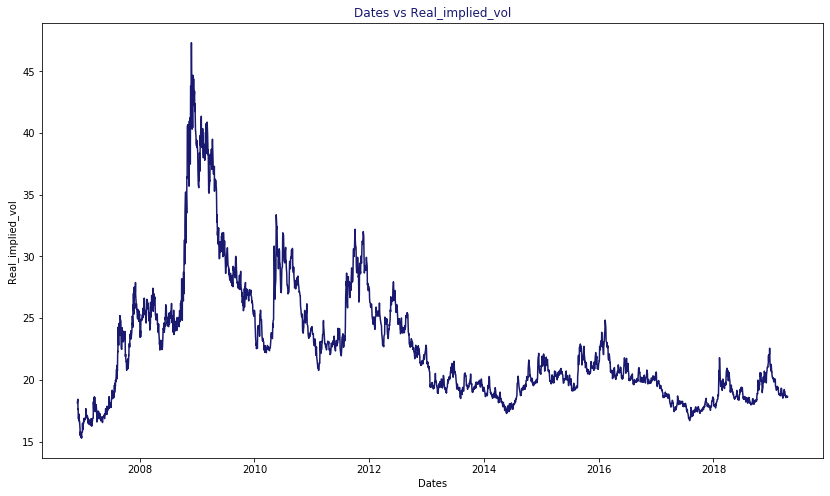

Strike = 90, Duration = 6M


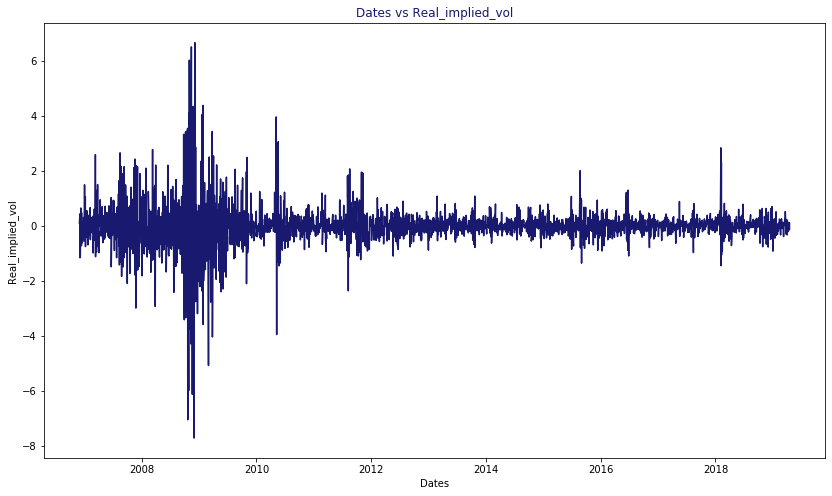

Strike = 90, Duration = 1Y


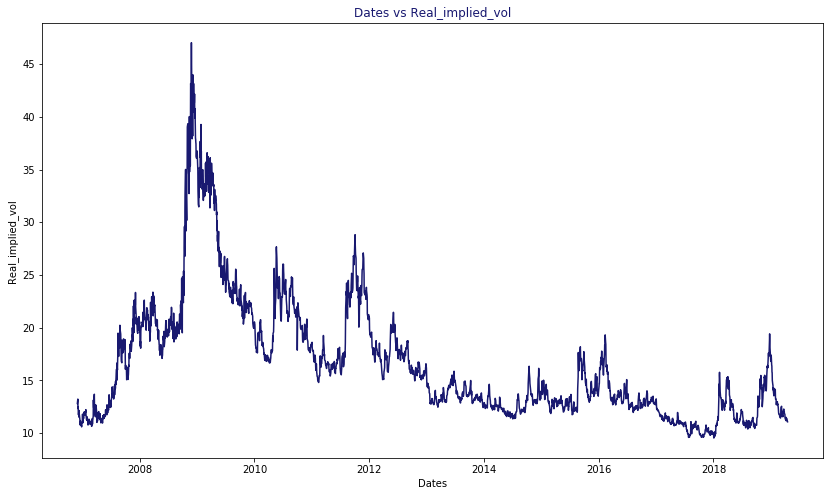

Strike = 90, Duration = 18M


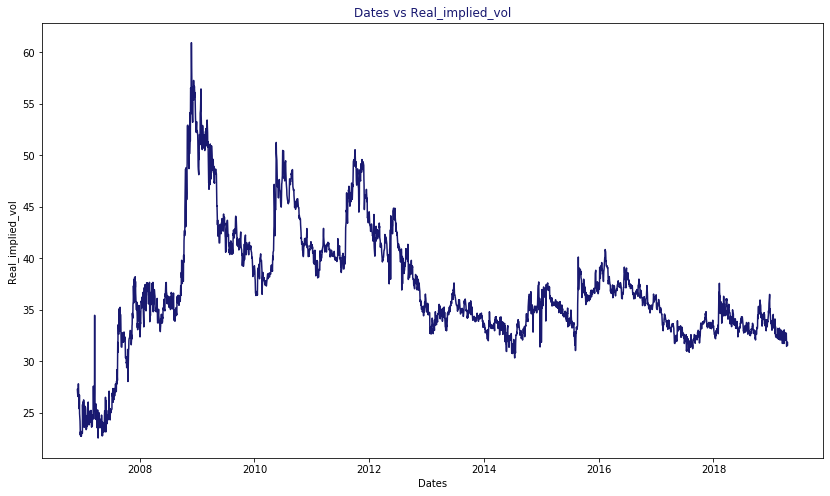

Strike = 90, Duration = 2Y


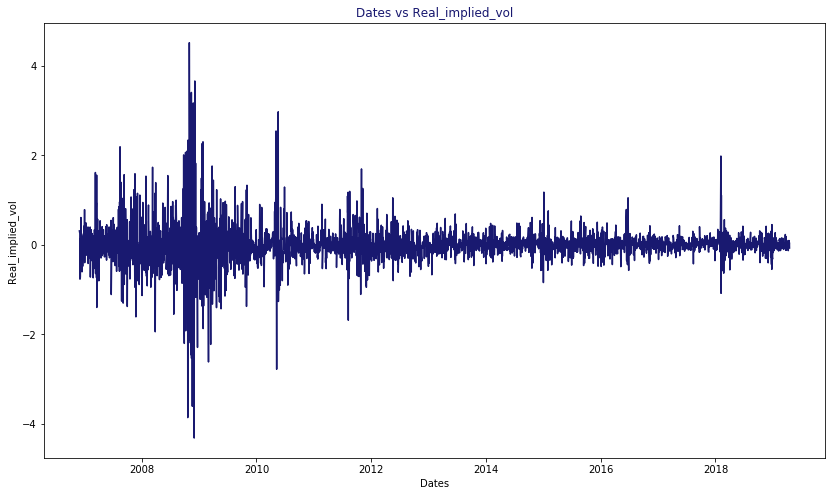

Strike = 90, Duration = 3Y


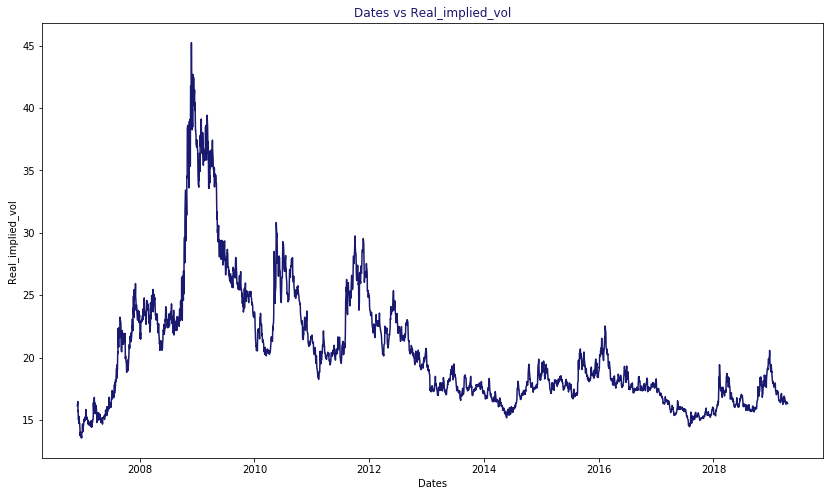

Strike = 100, Duration = 6M


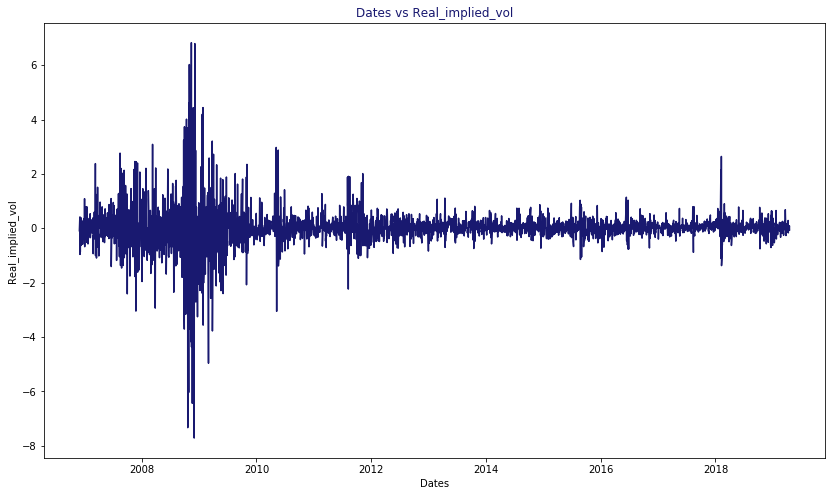

Strike = 100, Duration = 1Y


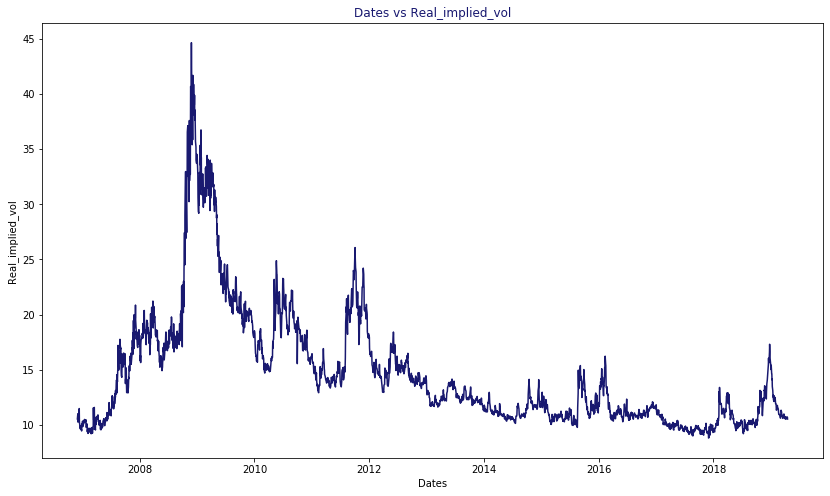

Strike = 100, Duration = 18M


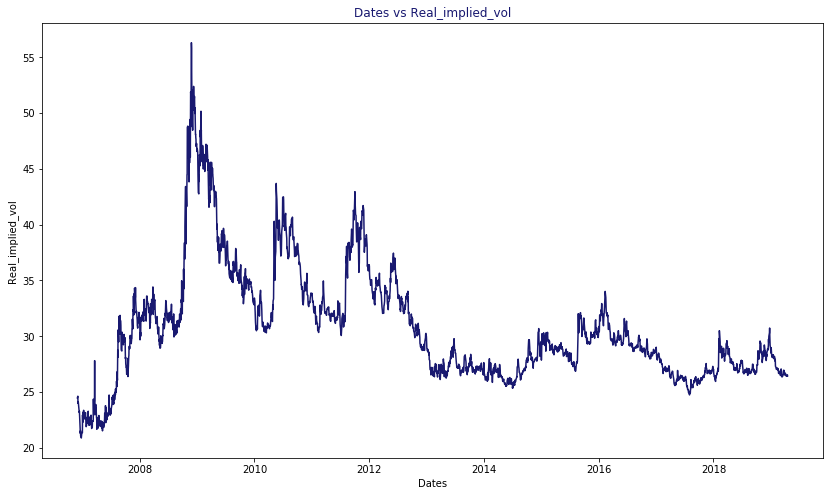

Strike = 100, Duration = 2Y


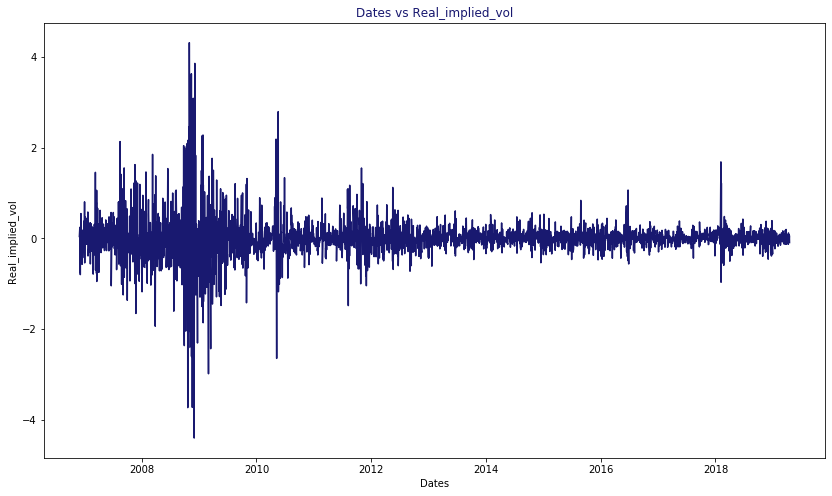

Strike = 100, Duration = 3Y


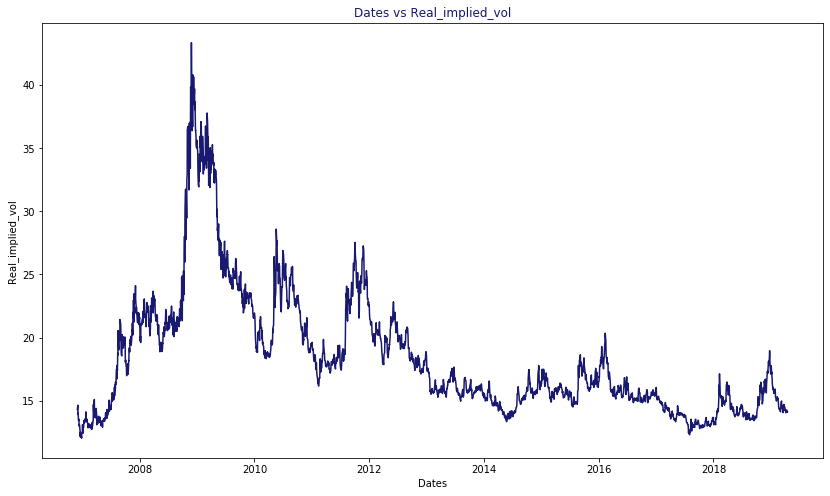

Strike = 110, Duration = 6M


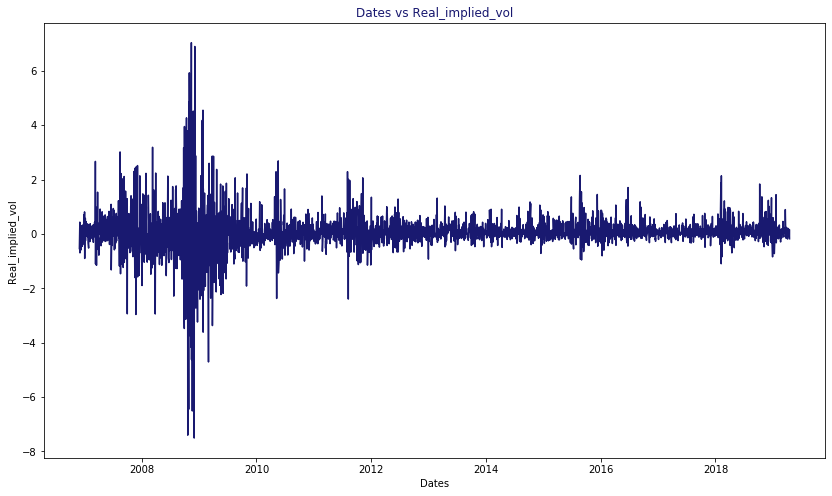

Strike = 110, Duration = 1Y


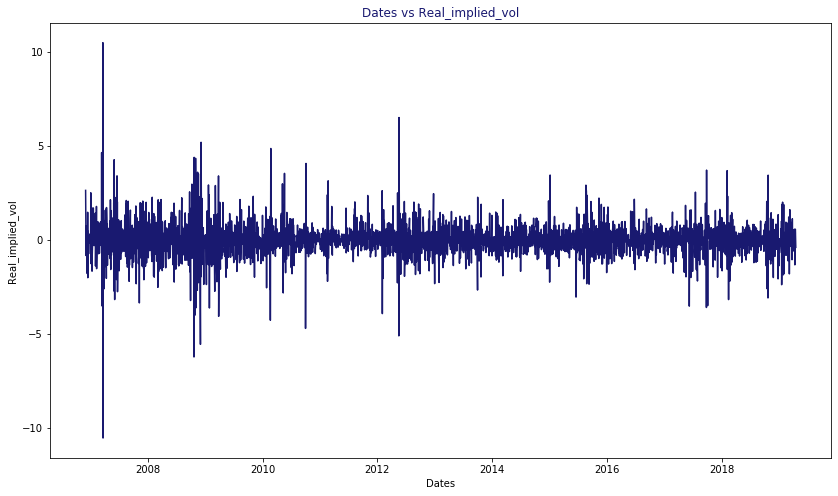

Strike = 110, Duration = 18M


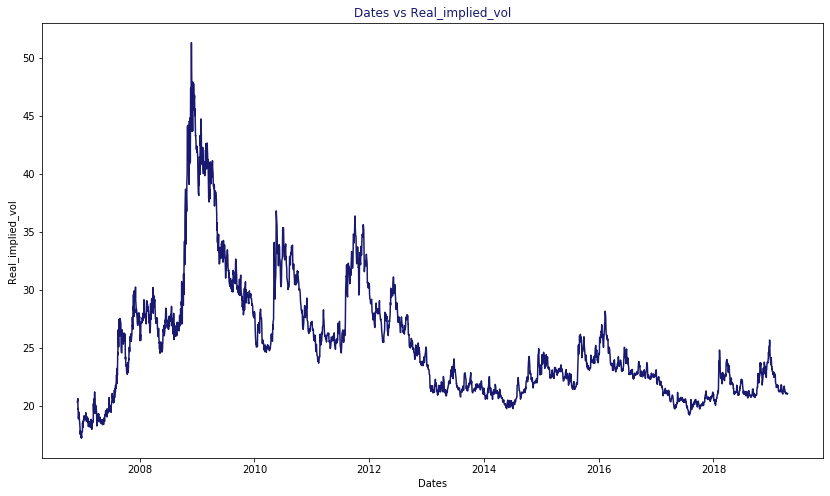

Strike = 110, Duration = 2Y


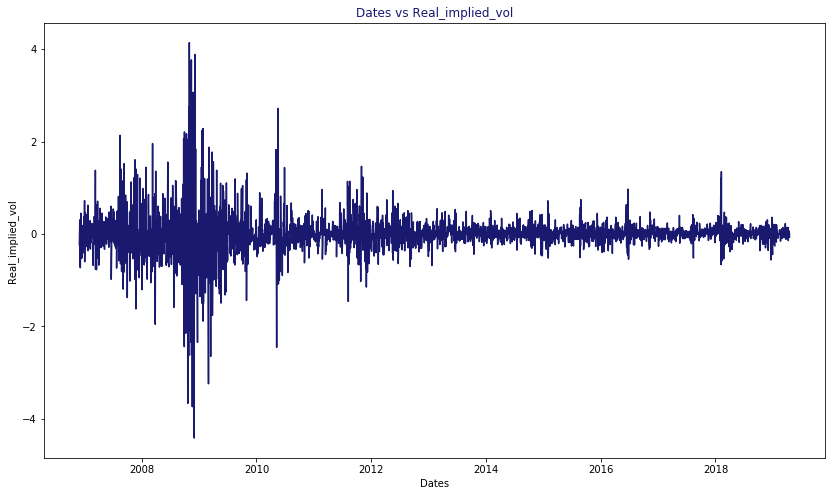

Strike = 110, Duration = 3Y


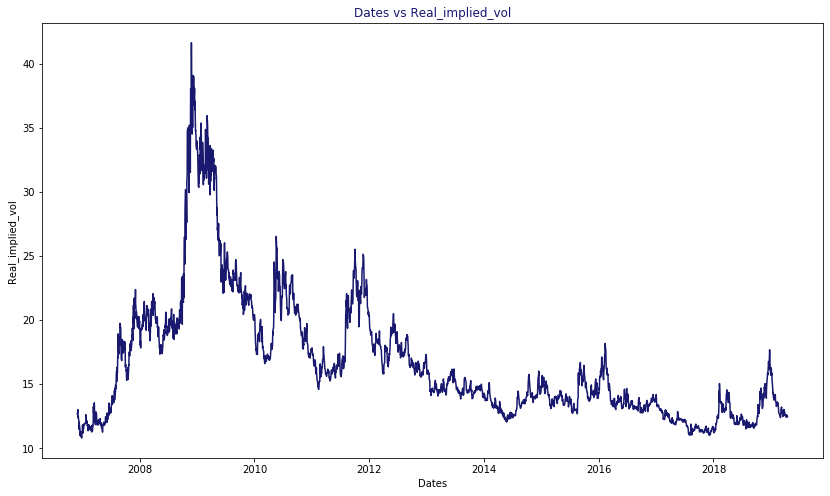

Strike = 120, Duration = 6M


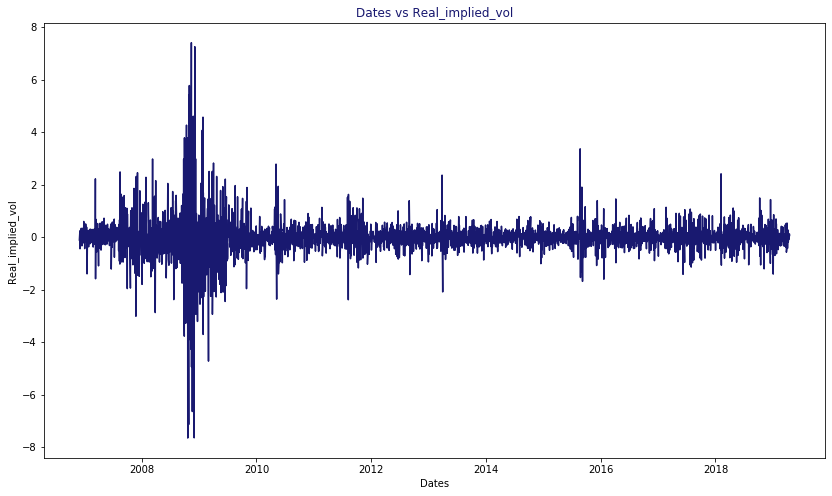

Strike = 120, Duration = 1Y


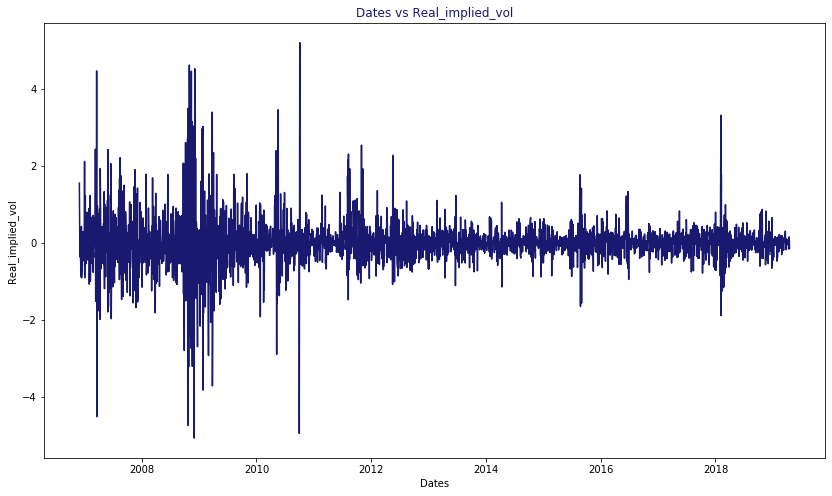

Strike = 120, Duration = 18M


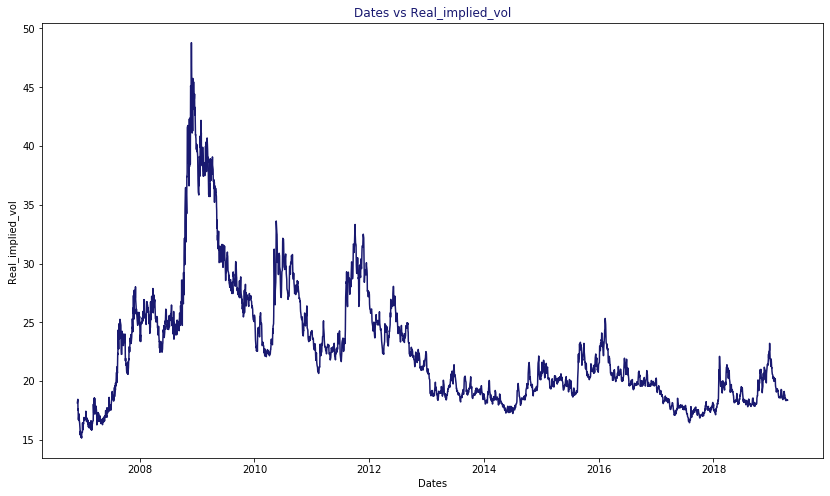

Strike = 120, Duration = 2Y


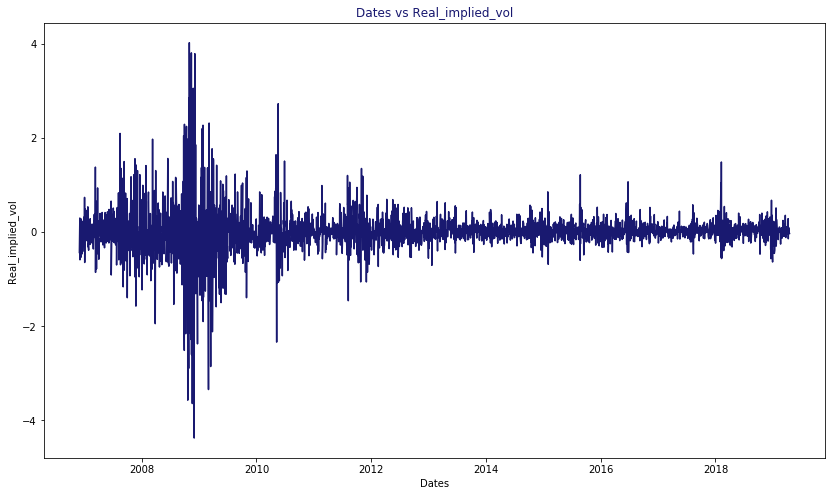

Strike = 120, Duration = 3Y


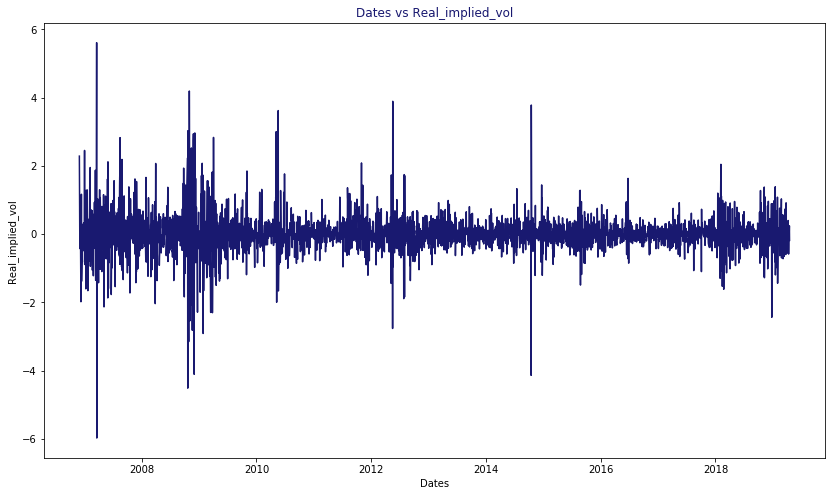

Strike = 140, Duration = 6M


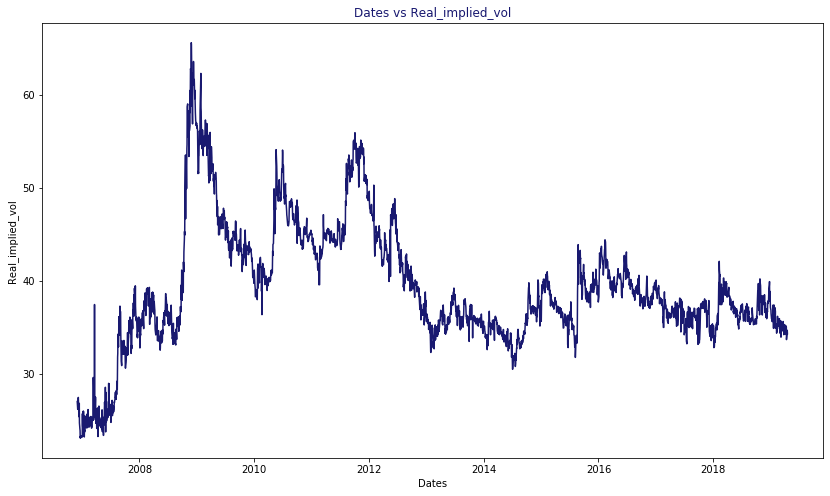

Strike = 140, Duration = 1Y


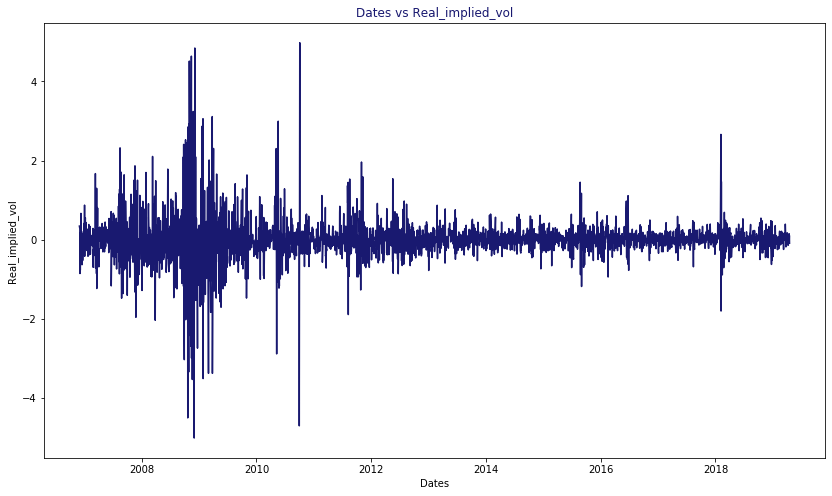

Strike = 140, Duration = 18M


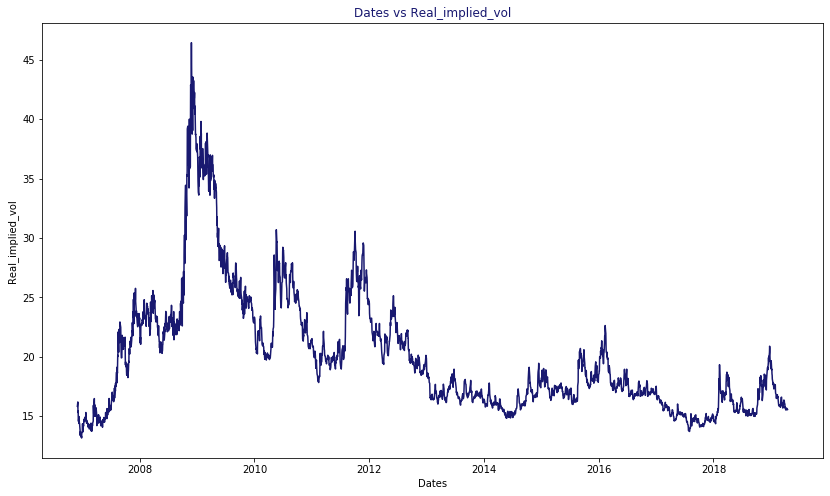

Strike = 140, Duration = 2Y


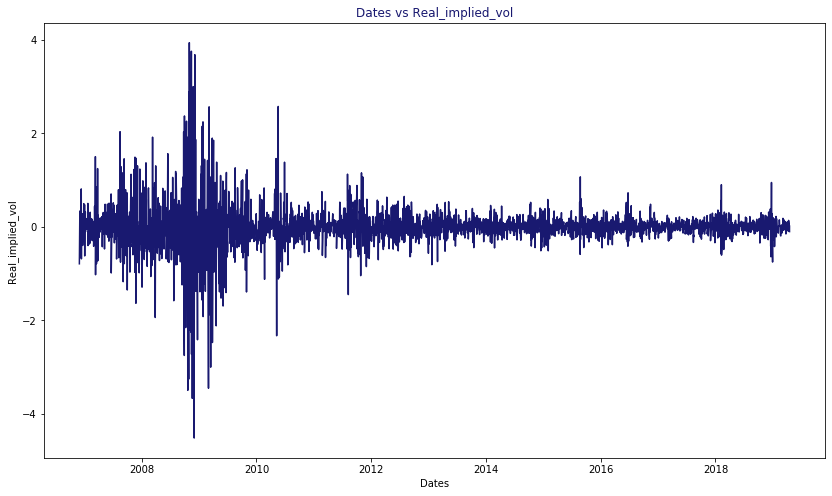

In [24]:
from implied_vol_prediction.src.graphs import graph_df_strike_duration_selection

for s in strikes: 
    for d in durations: 
        if not((d == "3Y") and (s == 140)): 
            graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, d, s, "Dates", "Real_implied_vol")
    

## Plot same duration options with different strike values, spots_iv_index_spx_ai_daily

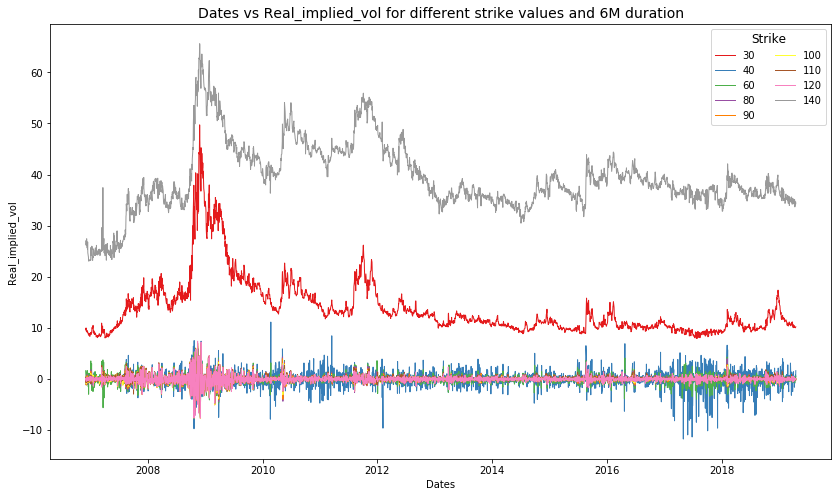

In [25]:
from implied_vol_prediction.src.graphs import plot_different_strike_values

plot_different_strike_values(spots_iv_index_spx_ai_daily, "6M", "Dates", "Real_implied_vol")

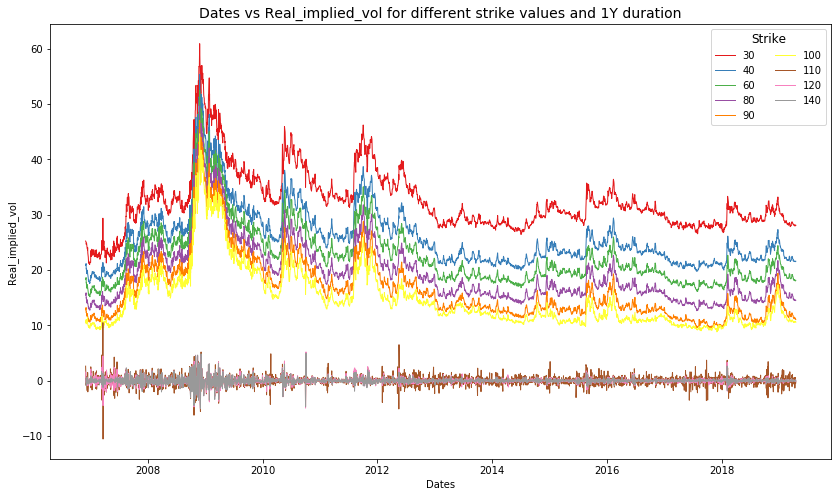

In [281]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "1Y", "Dates", "Real_implied_vol")

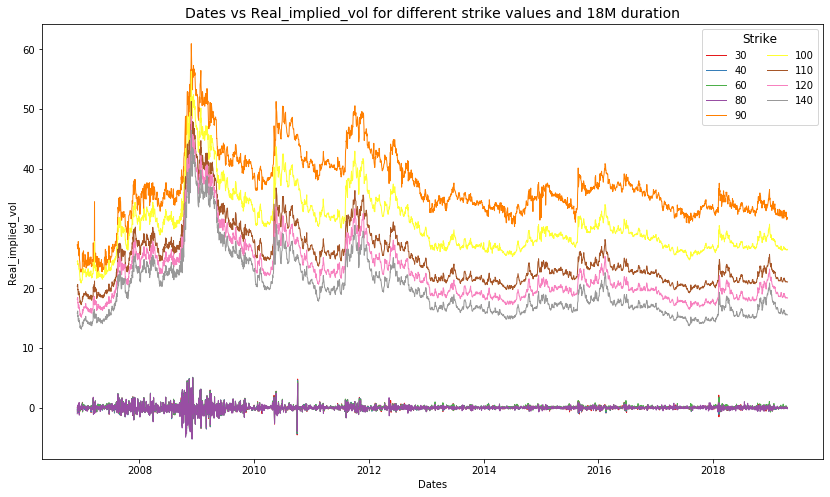

In [282]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "18M", "Dates", "Real_implied_vol")

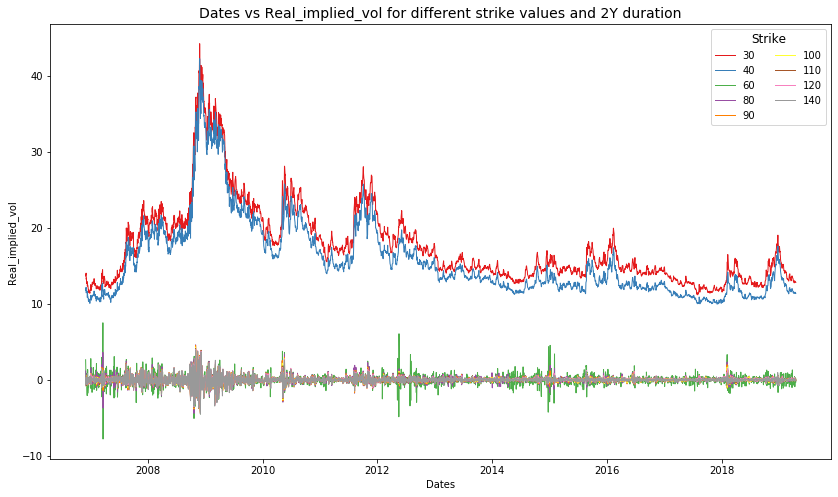

In [283]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "2Y", "Dates", "Real_implied_vol")

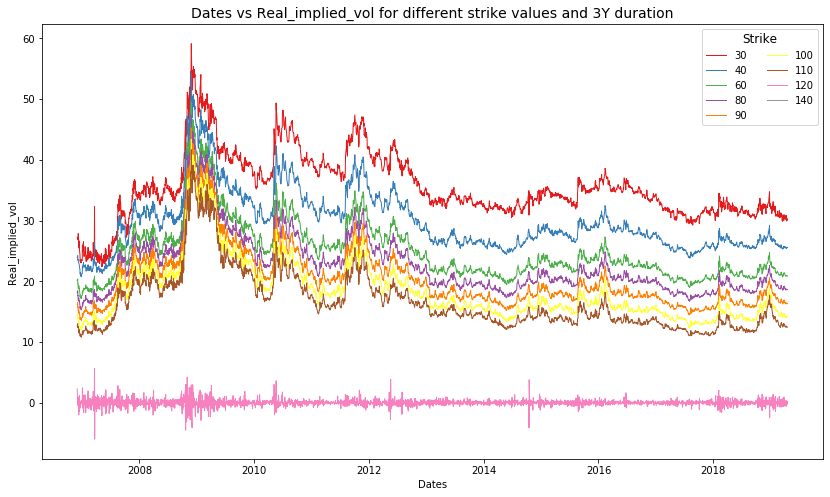

In [284]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "3Y", "Dates", "Real_implied_vol")

# Plot same strike options for different duration 

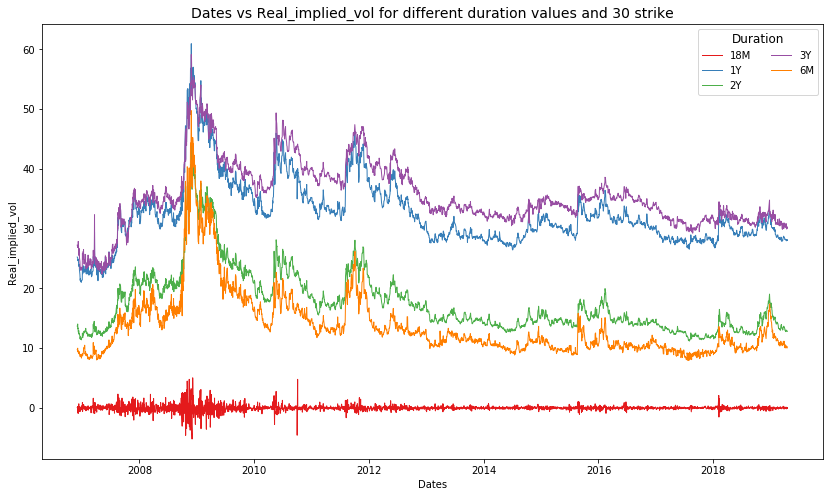

In [31]:
from implied_vol_prediction.src.graphs import plot_different_duration_values

plot_different_duration_values(spots_iv_index_spx_ai_daily, 30, "Dates", "Real_implied_vol")

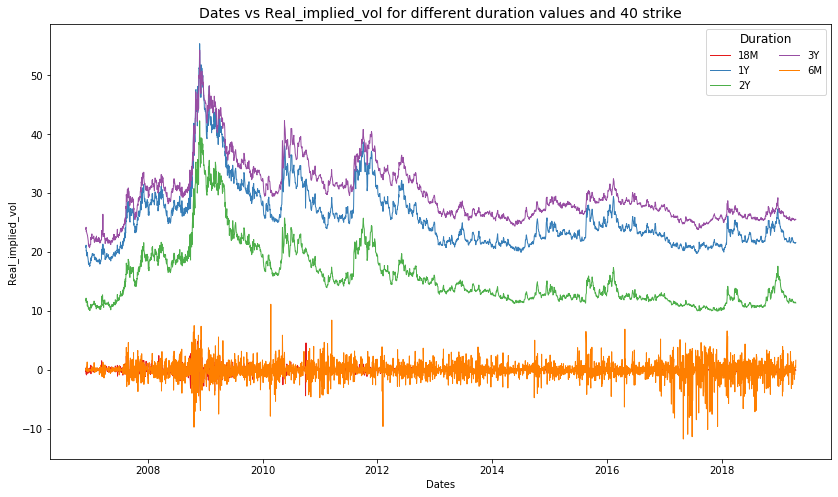

In [295]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 40, "Dates", "Real_implied_vol")

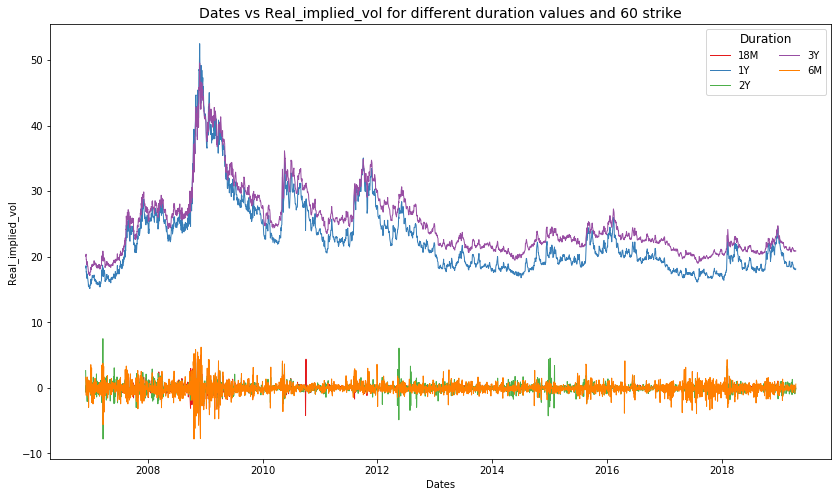

In [296]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 60, "Dates", "Real_implied_vol")

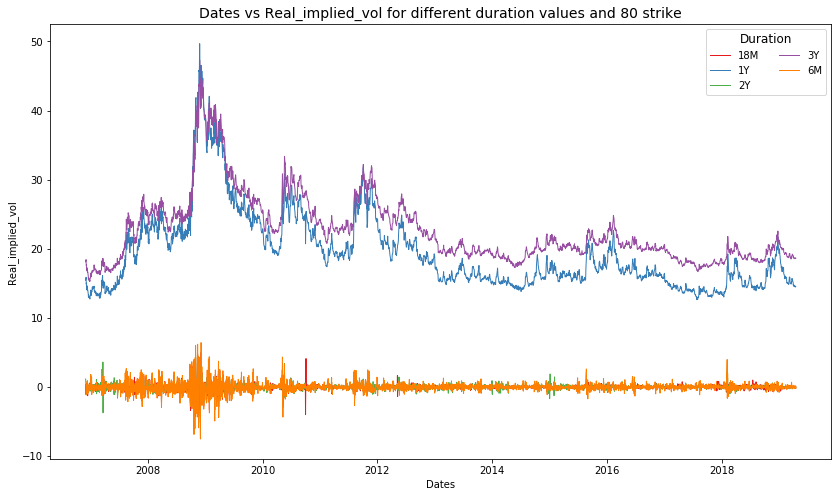

In [297]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 80, "Dates", "Real_implied_vol")

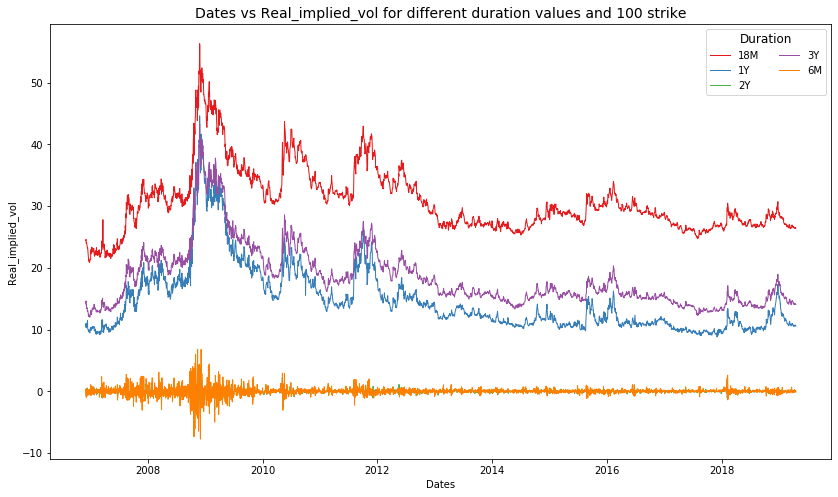

In [298]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 100, "Dates", "Real_implied_vol")

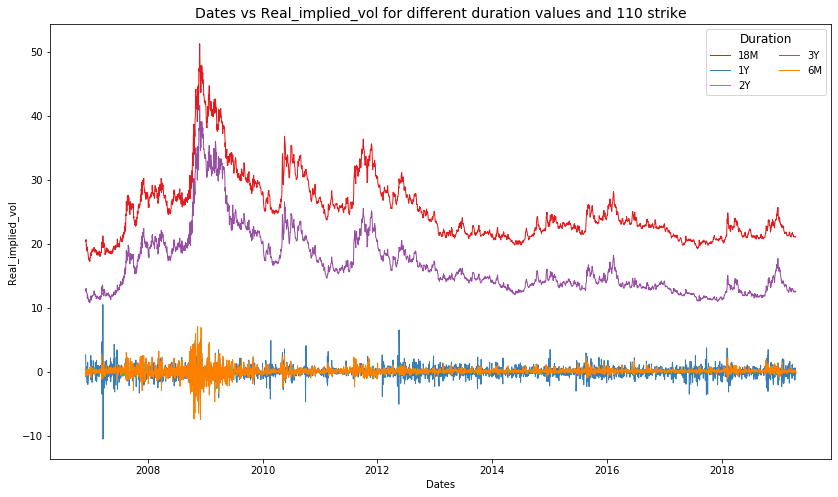

In [299]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 110, "Dates", "Real_implied_vol")

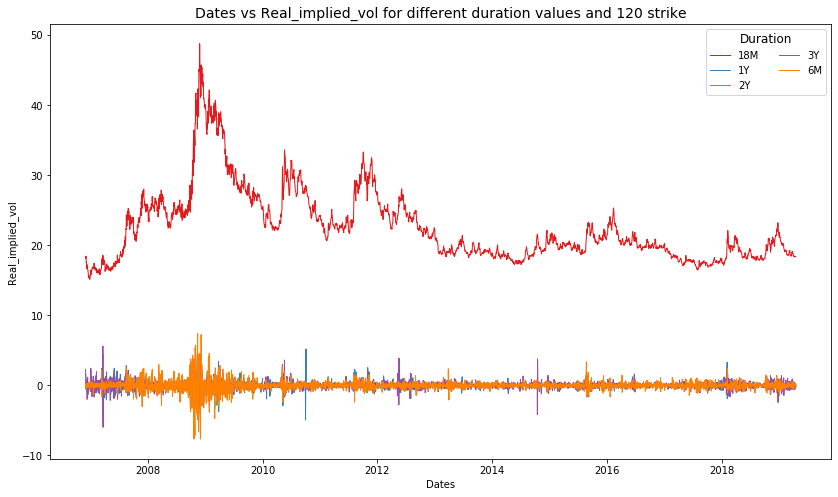

In [300]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 120, "Dates", "Real_implied_vol")

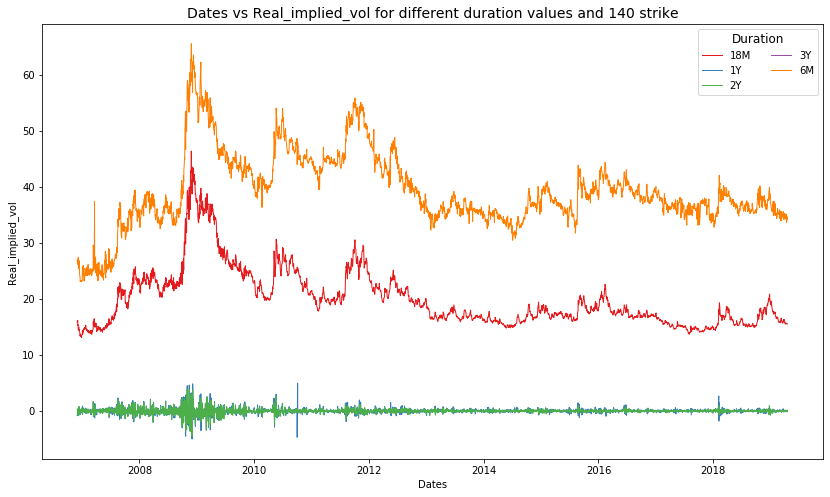

In [302]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 140, "Dates", "Real_implied_vol")

### spots_iv_index_sx5e_ai_daily

In [26]:
!ls ../data/

spots_iv_index_spx_ai_daily.xlsx   spots_iv_index_sx5e_ai_daily.xlsx
spots_iv_index_spx_ai_weekly.xlsx  spots_iv_index_sx5e_ai_weekly.xlsx


In [27]:
spots_iv_index_sx5e_ai_daily = open_and_transform_csv(r'../data/spots_iv_index_sx5e_ai_daily.xlsx')

In [28]:
spots_iv_index_sx5e_ai_daily.isnull().sum()

Dates               0
Spot t              0
Spot t-1            0
Implied_vol         0
Duration            0
Strike              0
Real_implied_vol    0
dtype: int64

In [29]:
spots_iv_index_sx5e_ai_daily.head()

Dates   Spot t  Spot t-1  Implied_vol Duration  Strike  \
0 2019-04-18  3477.73   3477.73      39.7231       6M      30   
1 2019-04-17  3477.73   3463.36      39.7774       6M      30   
2 2019-04-16  3463.36   3450.46      40.2187       6M      30   
3 2019-04-15  3450.46   3447.83      39.5568       6M      30   
4 2019-04-12  3447.83   3435.34      39.4741       6M      30   

   Real_implied_vol  
0         11.177800  
1         11.186432  
2         10.952175  
3         11.050433  
4         10.942030

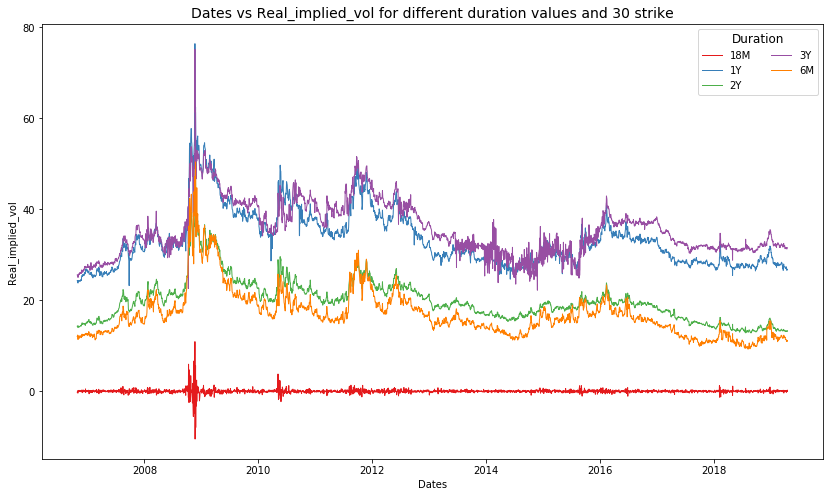

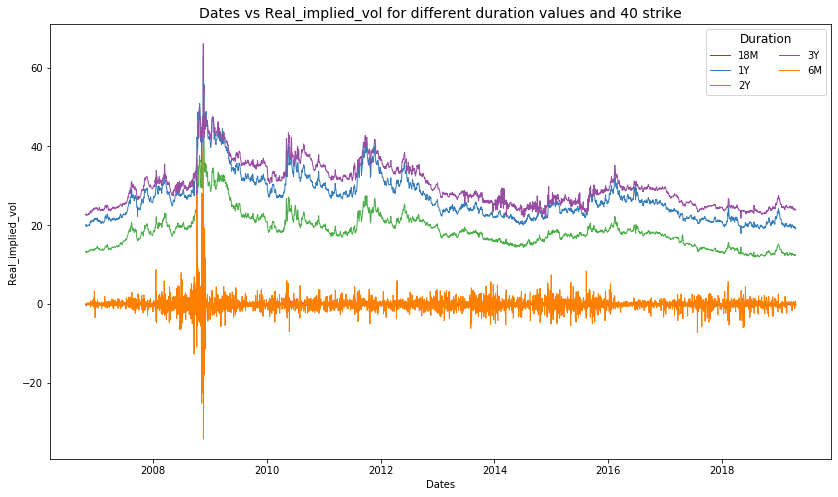

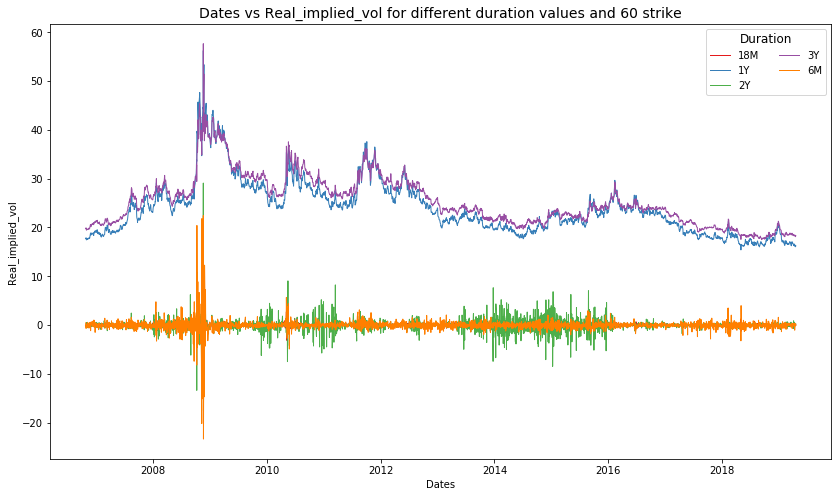

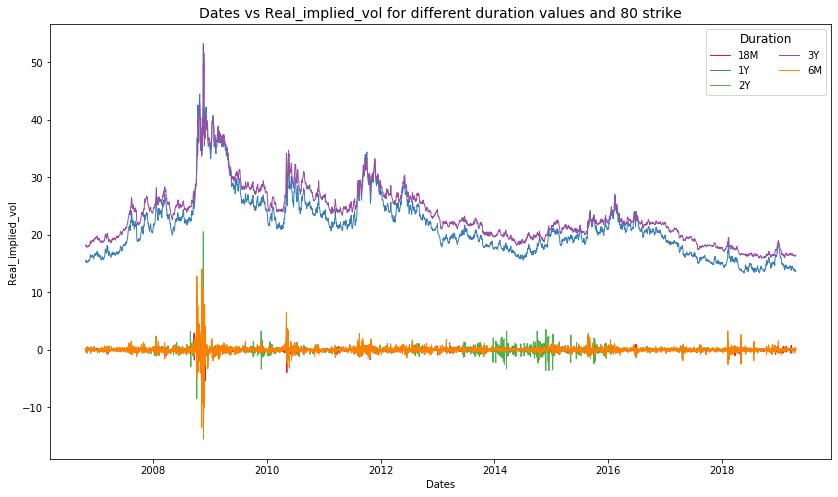

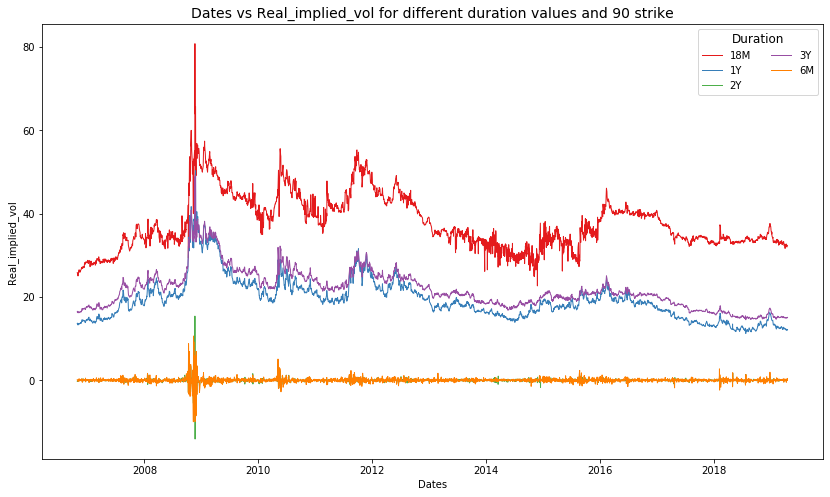

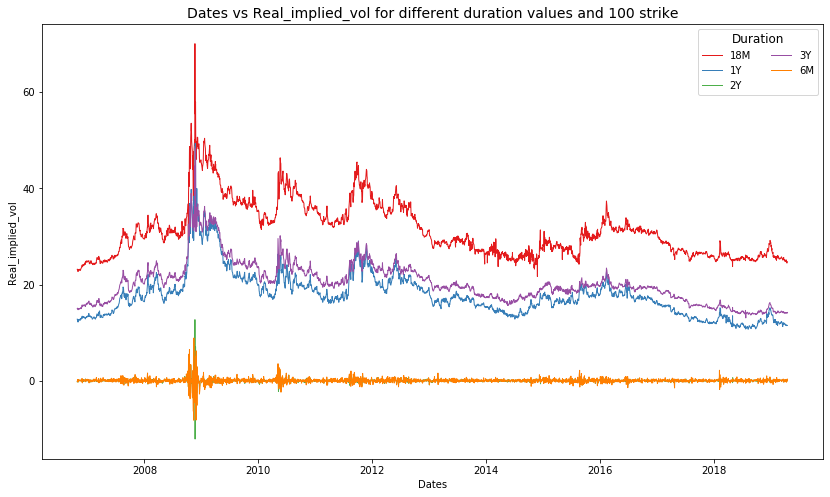

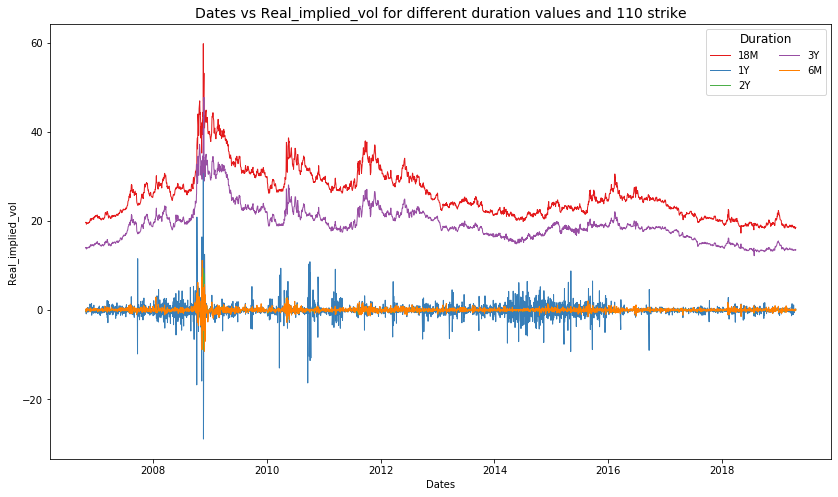

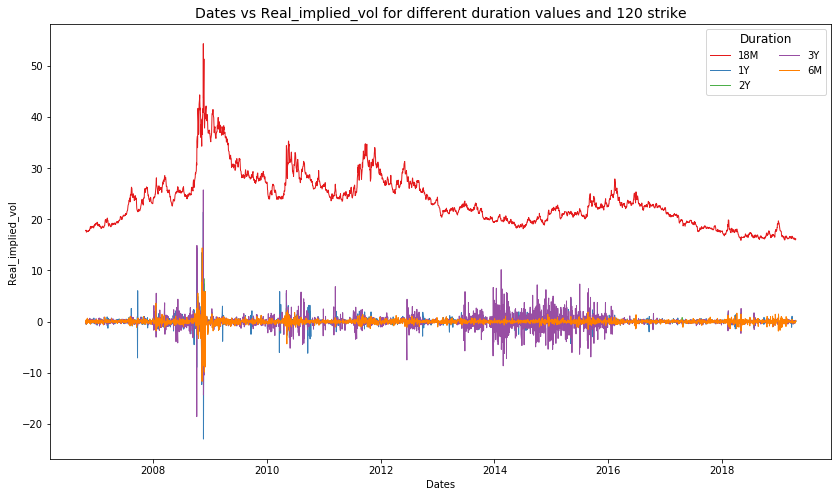

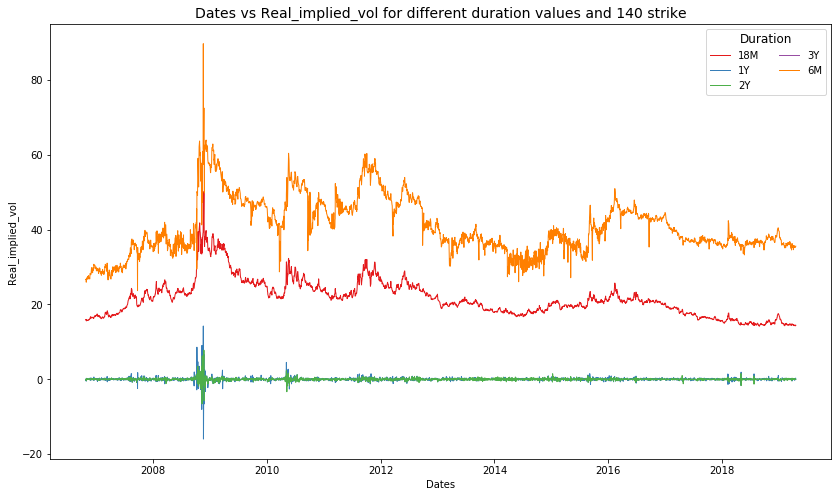

In [32]:
for s in list(np.unique(spots_iv_index_sx5e_ai_daily.Strike.values)): 
    plot_different_duration_values(spots_iv_index_sx5e_ai_daily, s, "Dates", "Real_implied_vol")

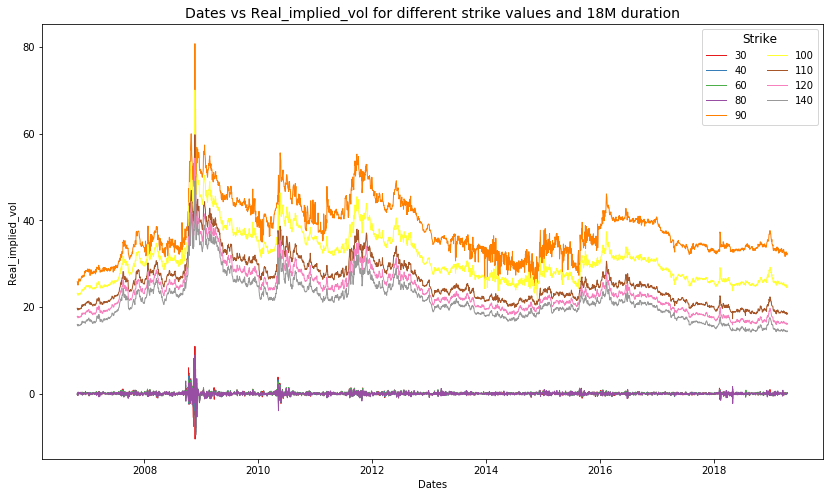

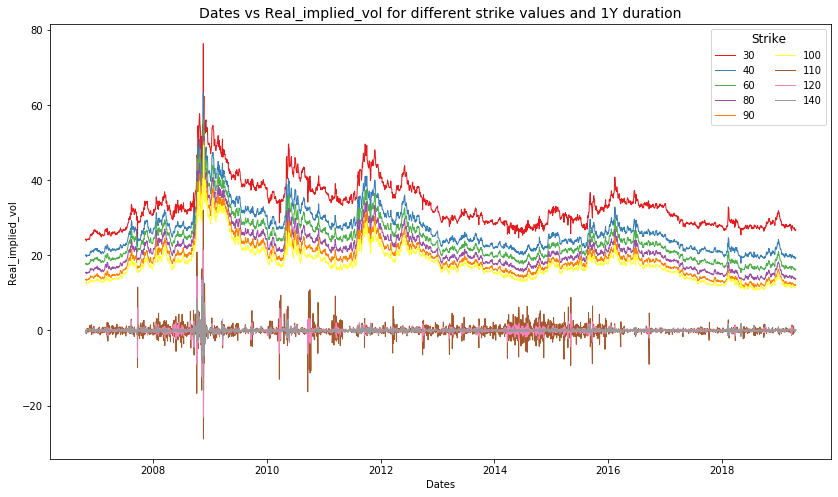

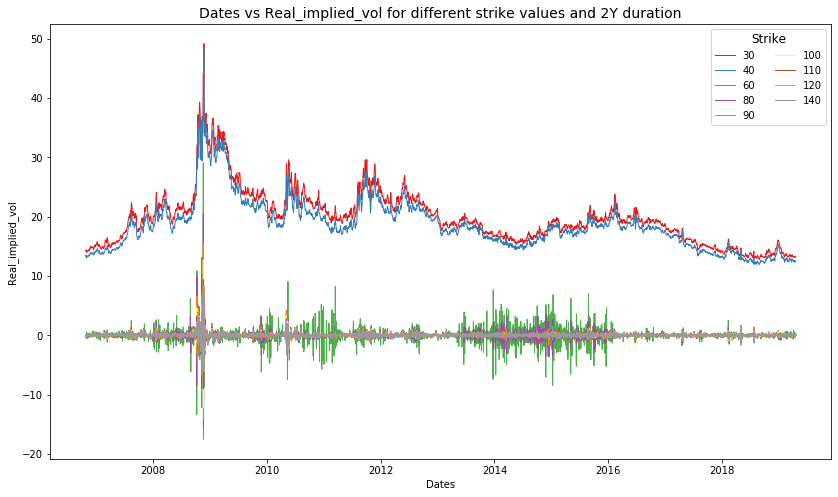

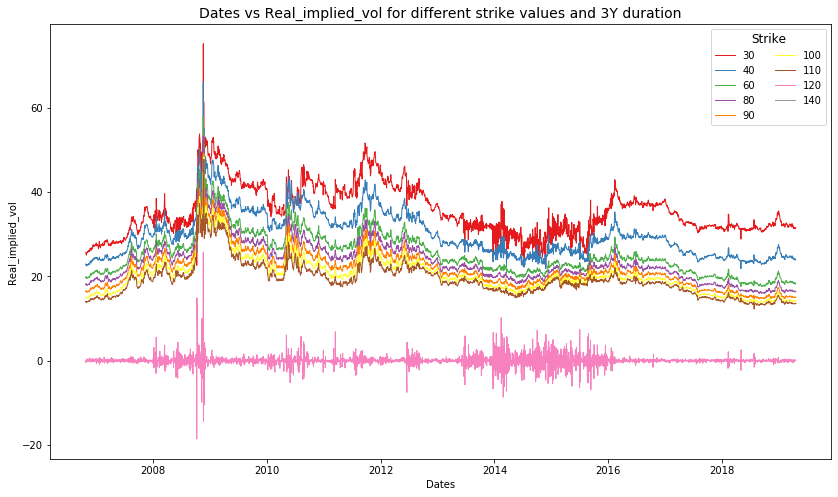

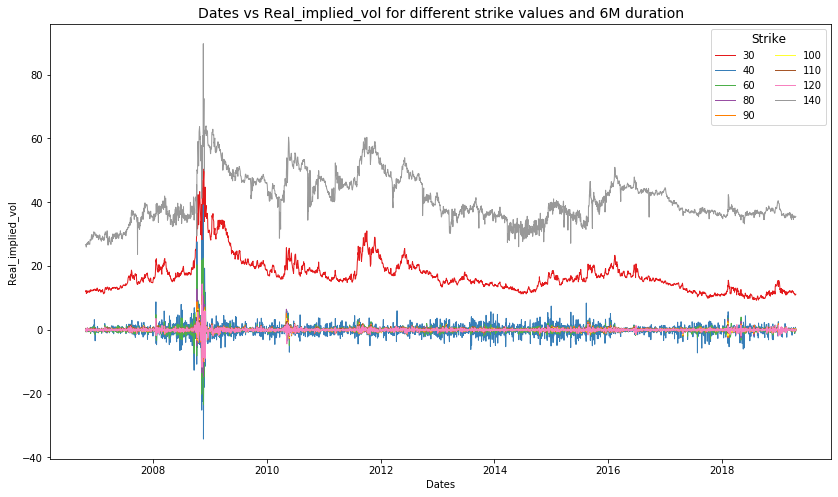

In [33]:
for d in list(np.unique(spots_iv_index_sx5e_ai_daily.Duration.values)): 
    plot_different_strike_values(spots_iv_index_sx5e_ai_daily, d, "Dates", "Real_implied_vol")

# Cross correlation tables 
## 1) Pearson correlation
Correlation / SD of each option 

In [34]:
spots_iv_index_sx5e_ai_daily.head()

Dates   Spot t  Spot t-1  Implied_vol Duration  Strike  \
0 2019-04-18  3477.73   3477.73      39.7231       6M      30   
1 2019-04-17  3477.73   3463.36      39.7774       6M      30   
2 2019-04-16  3463.36   3450.46      40.2187       6M      30   
3 2019-04-15  3450.46   3447.83      39.5568       6M      30   
4 2019-04-12  3447.83   3435.34      39.4741       6M      30   

   Real_implied_vol  
0         11.177800  
1         11.186432  
2         10.952175  
3         11.050433  
4         10.942030

In [92]:
from implied_vol_prediction.src.data_analysis import create_corr_table

pearson_corr_table = create_corr_table(spots_iv_index_sx5e_ai_daily)

In [122]:
pearson_corr_table[(pearson_corr_table["Pearson correlation"] >= 0.8)].sort_values(by=['Pearson correlation'], 
                                                                                   ascending=False)

Duration1  Strike1 Duration2  Strike2  Pearson correlation
549       18M      140        2Y       30             0.997825
525       18M      120        3Y       80             0.997306
562       18M      140        3Y       90             0.997007
488       18M      110        3Y       60             0.996947
543       18M      140        1Y       80             0.996444
..        ...      ...       ...      ...                  ...
593        2Y       40        6M      140             0.812960
248       18M       30        6M      100             0.812502
791        3Y      110        6M      140             0.806628
341       18M       60        2Y      140             0.806300
245       18M       30        6M       60             0.804820

[209 rows x 5 columns]

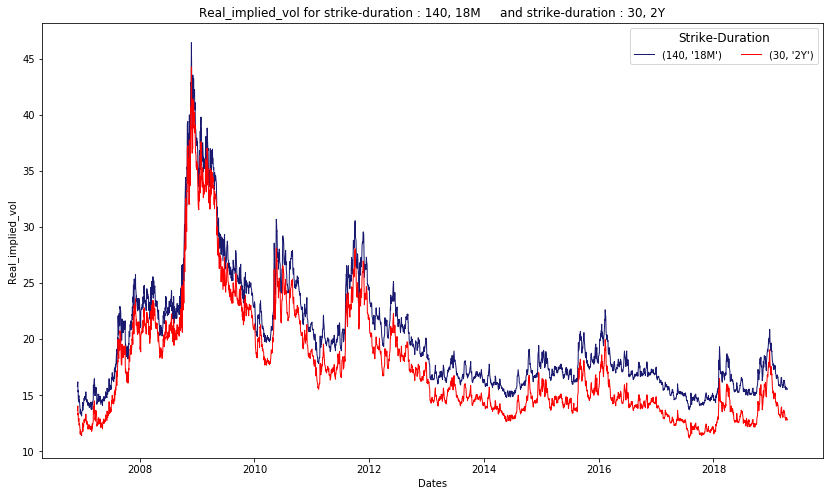

In [123]:
from implied_vol_prediction.src.graphs import double_graph

double_graph(spots_iv_index_spx_ai_daily, "18M", 140, "2Y", 30, "Dates", "Real_implied_vol")

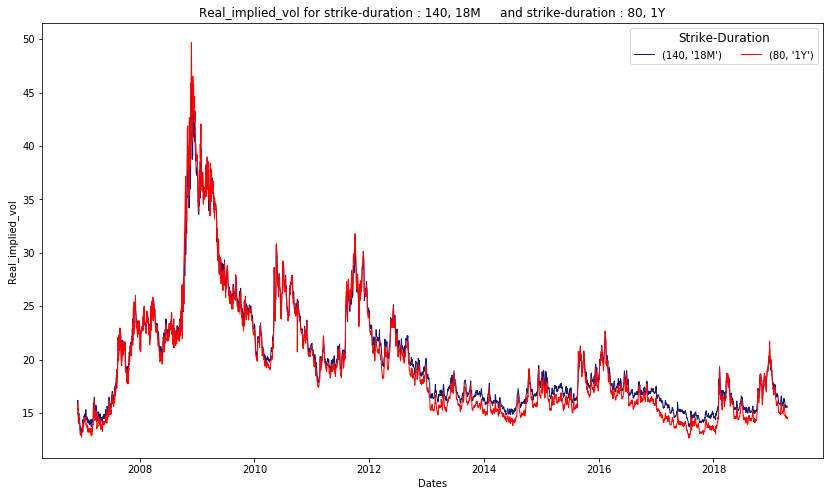

In [124]:
double_graph(spots_iv_index_spx_ai_daily, "18M", 140, "1Y", 80, "Dates", "Real_implied_vol")